In [36]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [37]:
'''Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of a multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient or to prescribe a drug to a new patient.'''

'Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y.\n\nPart of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.\n\nIt is a sample of a multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient or to prescribe a drug to a new patient.'

In [38]:
df= pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Data Analysis and pre-processing
You should apply some basic analytics steps to understand the data better. First, let us gather some basic information about the dataset. bold text

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [40]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [41]:
le= LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['BP']=le.fit_transform(df['BP'])
df['Cholesterol']=le.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [42]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [43]:
target={'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
df['Drug_num']=df['Drug'].map(target)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


In [44]:
'''use the corr() function to find the correlation
of the input variables with the target variable.'''
df.drop('Drug',axis=1,inplace= True)
cor=df.corr()['Drug_num']

In [45]:
#Arrange the variables according to the strength of their impact on the goal
impotant_corr=cor.sort_values(ascending=False)
print (impotant_corr)

Drug_num       1.000000
Na_to_K        0.589120
BP             0.372868
Cholesterol    0.055629
Age           -0.004828
Sex           -0.098573
Name: Drug_num, dtype: float64


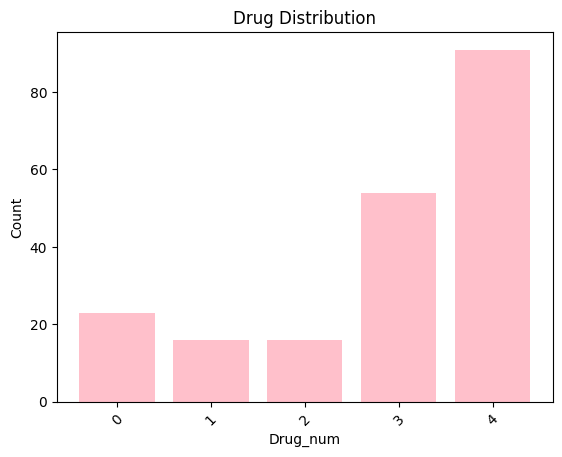

In [46]:
categ_count=df['Drug_num'].value_counts()
plt.bar(categ_count.index,categ_count.values,color='Pink')
plt.xticks(rotation=45)
plt.xlabel('Drug_num')
plt.ylabel('Count')
plt.title('Drug Distribution')
plt.show()


In [47]:
y=df['Drug_num']
x=df.drop('Drug_num',axis=1)

In [48]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_num
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3 ,random_state=32)

In [50]:
drug_tree=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [51]:
drug_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [52]:
tree_pred=drug_tree.predict(x_test)

In [53]:
accuracy=accuracy_score(y_test,tree_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9833333333333333


In [54]:
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 98.33%


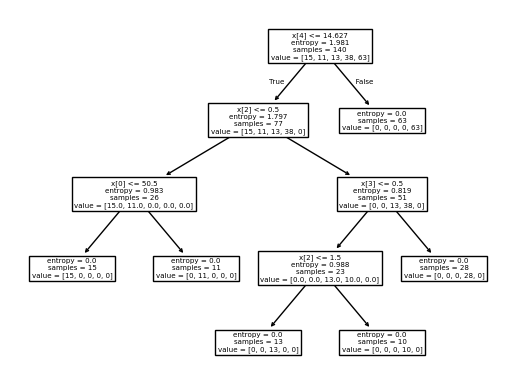

In [59]:
tree.plot_tree(drug_tree)
plt.show()

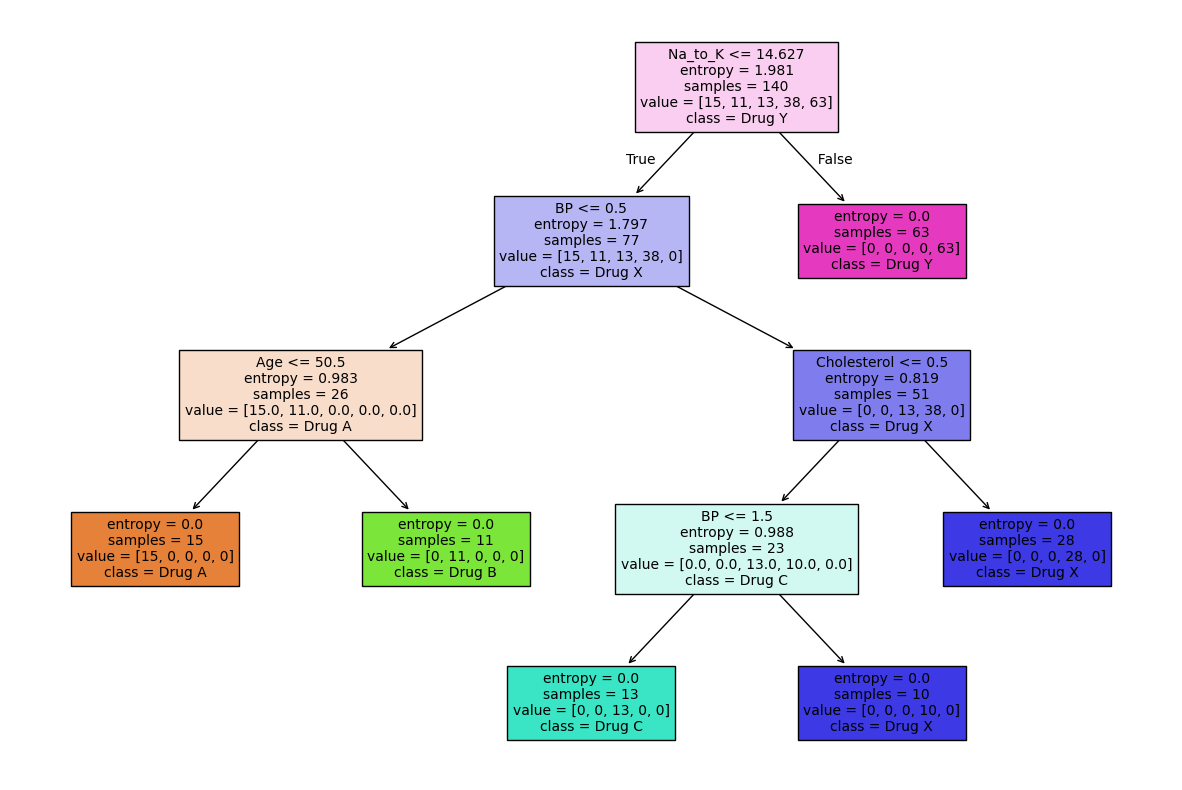

In [69]:
plt.figure(figsize=(15,10))
tree.plot_tree(
    drug_tree,
    feature_names=x.columns,
    class_names=['Drug A','Drug B','Drug C','Drug X','Drug Y'],
    filled=True,
    fontsize=10
)
plt.show()